# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

**a)** Função lógica XOR <br>
**b)** _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4
&nbsp;

### b) _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = []
y = []

X= np.loadtxt('data_x.txt', dtype=float, delimiter=",", encoding='bytes')
y= np.loadtxt('data_y.txt', dtype=float, delimiter=",", encoding='bytes')
print(X)

[[3.37768741 3.03181761 1.68228632 1.035667   2.04509889]
 [1.61973655 3.13519436 1.2132509  1.90638782 2.33352816]
 [3.63245154 2.01874742 1.12735138 3.02321682 2.47347599]
 ...
 [3.71380142 3.32504344 1.24161023 3.28832165 1.57219055]
 [1.99922567 1.453112   1.41887227 2.32830091 3.12827194]
 [2.79796451 3.07231182 0.05709307 2.12677357 1.41115441]]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [6]:
ann = tf.keras.models.Sequential()

In [7]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

ann.add(tf.keras.layers.Dense(units=5, activation='tanh'))

In [8]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [9]:
history= ann.fit(X_train, y_train, validation_split=0.2, epochs=900, batch_size=32, verbose=0)

In [10]:
y_pred = ann.predict(X_test)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[ 9  1  1  5  0]
 [ 2 10  1  0  0]
 [ 1  1  8  0  3]
 [ 4  1  5  6  4]
 [ 3  3  2  4  6]]


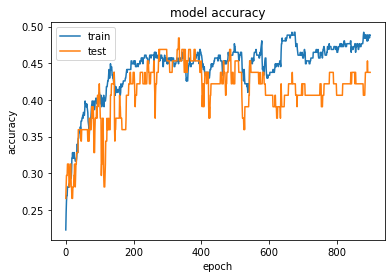

In [12]:
# summarize history for accuracy
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 